# Final Project: Movie Success

#### Tyler Roehr: On my honor, as a student, I have neither given nor received unauthorized aid on this academic work.

## Part 1: Business Understanding

IMDB scores rate a movies success in a market.  The higher it is rated the more successful it is.  We have a number of factors in the dataset that we are going to try and correlate to success.  What makes a movie successful or more likely to be successful?  We are going to answer these questions.

1. The goals of this project are to find the factors that contribute to a movie being successful while also filtering out useless and skewed data in the dataset.
2. If I were hired as a data analyst to predict how good a movie would perform the data I would collect would be data about duration, the director, top actors, and movie type/genre and try to correlate it to how successful the movie may be.
3. My prediction for variables that are highly correlated to imdb score are duration, the director, the lead actors in the movie, and the genre.


## Part 2: Data understanding

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import the scatter_matrix functionality
from pandas.plotting import scatter_matrix

import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# grid search
from sklearn.model_selection import GridSearchCV

import numpy as np
from scipy import stats




# import the scatter_matrix functionality
from pandas.plotting import scatter_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeRegressor
# grid search
from sklearn.model_selection import GridSearchCV

import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
          
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, svm
# import the scatter_matrix functionality
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.metrics import pairwise_distances

In [2]:
!pip install scikit-plot 

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
import scikitplot as skplt

In [5]:
df = pd.read_csv("data\movie_metadata.csv_movie_metadata.csv") #Import the data
df.head(1)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000


#### 2.1 First we need to descibe the dataset

In [6]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [8]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

#### We can see right off the bat that we have a number of null values that will skew analysis.

#### 2.2 Count the values of important columns to see how many missing values we have.

In [9]:
df['imdb_score'].count()

5043

In [10]:
df['movie_title'].count()

5043

In [11]:
df['director_name'].count()

4939

In [12]:
df['gross'].count()

4159

In [13]:
df['genres'].count()

5043

#### We see that Gross and Directors name are missing some values

In [14]:
df.nunique()

color                           2
director_name                2398
num_critic_for_reviews        528
duration                      191
director_facebook_likes       435
actor_3_facebook_likes        906
actor_2_name                 3032
actor_1_facebook_likes        878
gross                        4035
genres                        914
actor_1_name                 2097
movie_title                  4917
num_voted_users              4826
cast_total_facebook_likes    3978
actor_3_name                 3521
facenumber_in_poster           19
plot_keywords                4760
movie_imdb_link              4919
num_user_for_reviews          954
language                       47
country                        65
content_rating                 18
budget                        439
title_year                     91
actor_2_facebook_likes        917
imdb_score                     78
aspect_ratio                   22
movie_facebook_likes          876
dtype: int64

#### This shows that there are duplicated movie titles that will need to be removed.

## Part 3: Data Preparation

We need to filter out the bad data so that we don't skew our results.

#### 3.1 Remove the duplicate movies

In [15]:
df = df.drop_duplicates(keep='last')

In [16]:
len(df)

4998

#### 3.2 Split apart the genres

In [17]:
g = df[['genres', 'imdb_score']]
g.head()

,genres,imdb_score
0,Action|Adventure|Fantasy|Sci-Fi,7.9
1,Action|Adventure|Fantasy,7.1
2,Action|Adventure|Thriller,6.8
3,Action|Thriller,8.5
4,Documentary,7.1


In [18]:
len(g)

4998

In [19]:
b = pd.DataFrame(g.genres.str.split('|').tolist(), index=g.imdb_score).stack()
b = b.reset_index()[[0, 'imdb_score']] 
b.columns = ['genres', 'imdb_score']
b.head()

,genres,imdb_score
0,Action,7.9
1,Adventure,7.9
2,Fantasy,7.9
3,Sci-Fi,7.9
4,Action,7.1


#### 3.3  All the movie titles have 'A' in them and we need to fix that

In [20]:
df['movie_title'] = df['movie_title'].str.replace("Â", "")
df['movie_title'].head()

0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
Name: movie_title, dtype: object

#### 3.4 Lets tackle deleting some of the null values

Here are the rows with null values

In [21]:
df.isnull().sum()

color                         19
director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

I am going to remove gross null rows.  A mean replacement could be done but I am certain this will throw off the data.  Budget has a high null amount so I am going drop some rows too.

In [22]:
df = df[df['gross'].notnull()]
df = df[df['budget'].notnull()]
df.isnull().sum()

color                         2
director_name                 0
num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_3_facebook_likes       10
actor_2_name                  5
actor_1_facebook_likes        3
gross                         0
genres                        0
actor_1_name                  3
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 10
facenumber_in_poster          6
plot_keywords                31
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
content_rating               51
budget                        0
title_year                    0
actor_2_facebook_likes        5
imdb_score                    0
aspect_ratio                 74
movie_facebook_likes          0
dtype: int64

## Part 4: Business Intelligence

#### Now that the data is cleaned we need to run some tests to see what makes a movies imdb score high

The first thing I wanted to see is which movie is rated the highest

In [23]:
df.sort_values(by=['imdb_score'], ascending=False).head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1937,Color,Frank Darabont,199.0,142.0,0.0,461.0,Jeffrey DeMunn,11000.0,28341469.0,Crime|Drama,...,4144.0,English,USA,R,25000000.0,1994.0,745.0,9.3,1.85,108000
3466,Color,Francis Ford Coppola,208.0,175.0,0.0,3000.0,Marlon Brando,14000.0,134821952.0,Crime|Drama,...,2238.0,English,USA,R,6000000.0,1972.0,10000.0,9.2,1.85,43000


The top movies are rated 9.5 and 9.6 respectfully.  The language of both is in english, the genres aren't related to eachother Like I thought.  They are both in color.

#### 4.1 The relationship movie success has with duration of the movie

In [24]:
df['imdb_category'] = pd.cut(df['imdb_score'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], labels=[1,2,3,4,5,6,7,8,9,10])
df.groupby('imdb_category').size()

imdb_category
1        0
2        4
3       24
4       68
5      240
6      836
7     1511
8     1014
9      158
10       2
dtype: int64

##### Essentially makes a new column for imdb category, 10 being the highest rated.

In [25]:
df1 = df.groupby('imdb_category')
df1['duration'].agg('mean')

imdb_category
1            NaN
2      96.000000
3      94.416667
4      95.573529
5      97.895833
6     102.488623
7     109.112508
8     117.429980
9     134.791139
10    158.500000
Name: duration, dtype: float64

##### This is showing that longer movies tend to get rated higher except for the highest imdb rating

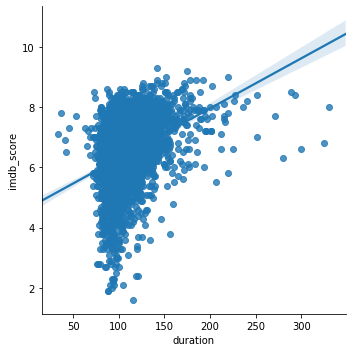

In [26]:
sns.lmplot("duration", "imdb_score", df, x_jitter=.15)

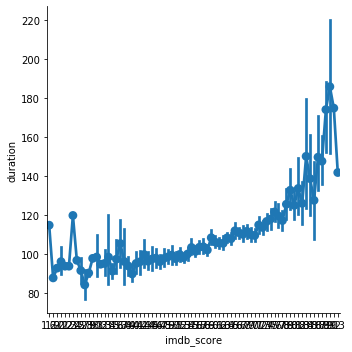

In [27]:
sns.catplot("imdb_score", "duration", data=df, kind='point')

##### We can see a slight increase in duration time leads to a higher imdb score, however again this drops down lower with the highest score

#### 4.2 Which director has the best chance of making a movie successful

In [28]:
df2 = df.groupby('director_name')
df2['imdb_score'].agg('mean').sort_values(ascending=False).head()

director_name
Charles Chaplin    8.6
Tony Kaye          8.6
Ron Fricke         8.5
Damien Chazelle    8.5
Majid Majidi       8.5
Name: imdb_score, dtype: float64

##### These are the directors with the highest mean imdb score.  Charles Chaplin is the best with an average of 8.6.  This measurement can be skewed due to some directors only making one film while others have multiple.  But this seems to be the most accurate measure of who is the best director.

In [29]:
df2['imdb_score'].agg('sum').sort_values(ascending=False).head()

director_name
Steven Spielberg    188.6
Clint Eastwood      136.9
Woody Allen         133.0
Martin Scorsese     122.8
Ridley Scott        120.2
Name: imdb_score, dtype: float64

##### We can also look at the sum of directors IMDB scores, this shows a different story.  Steven Spielberg is the best for this but this can also be skewed since he has simply done more movies, thus increasing the sum.

In [30]:
df2['imdb_score'].agg('count').sort_values(ascending=False).head()

director_name
Steven Spielberg     25
Woody Allen          19
Clint Eastwood       19
Ridley Scott         17
Steven Soderbergh    16
Name: imdb_score, dtype: int64

#### 4.3 Which genres contribute to movie success?

In [31]:
df2 = df.groupby('genres')
df2['imdb_score'].agg('mean').sort_values(ascending=False).head()

genres
Adventure|Animation|Drama|Family|Musical    8.5
Crime|Drama|Fantasy|Mystery                 8.5
Adventure|Animation|Fantasy                 8.4
Adventure|Drama|Thriller|War                8.4
Action|Adventure|Drama|Fantasy|War          8.4
Name: imdb_score, dtype: float64

##### The best genres for movies are Adventure/drama movies.  Animated is the highest rated category as well

#### 4.4 Which lead actor is best for making a movie successful?

In [32]:
df2 = df.groupby('actor_1_name')
df2['imdb_score'].agg('mean').sort_values(ascending=False).head()

actor_1_name
Takashi Shimura     8.7
Scatman Crothers    8.7
Bunta Sugawara      8.6
Paulette Goddard    8.6
Bahare Seddiqi      8.5
Name: imdb_score, dtype: float64

In [33]:
df2 = df.groupby('actor_1_name')
df2['imdb_score'].agg('sum').sort_values(ascending=False).head()

actor_1_name
Robert De Niro       281.8
Johnny Depp          258.2
Denzel Washington    212.5
J.K. Simmons         206.9
Matt Damon           201.2
Name: imdb_score, dtype: float64

#####  The same problem we had with directors is the same with actor 1, if the person makes more movies it effects their sum.  I am confident that the mean measurement is more accurate.  Takashi Shirmura has the highest chance of making a movie successful.

#### Lets look at actors 2 and 3 as well.

In [34]:
df2 = df.groupby('actor_2_name')
df2['imdb_score'].agg('mean').sort_values(ascending=False).head()

actor_2_name
Jeffrey DeMunn    8.9
Luigi Pistilli    8.9
Kenny Baker       8.8
Minoru Chiaki     8.7
Peter Cushing     8.7
Name: imdb_score, dtype: float64

In [35]:
df2 = df.groupby('actor_3_name')
df2['imdb_score'].agg('mean').sort_values(ascending=False).head()

actor_3_name
Phil LaMarr          8.9
Enzo Petito          8.9
Caroline Goodall     8.9
Sam Anderson         8.8
Eugenie Bondurant    8.8
Name: imdb_score, dtype: float64

##### Jeffrey DeMunn and Phil LaMarr are also good actors to have in a movie to make it successful

#### 4.5 Other observations

##### Lets take a look at rating

Text(0.5, 1, 'IMDB rating category(Higher is better) vs. content rating')

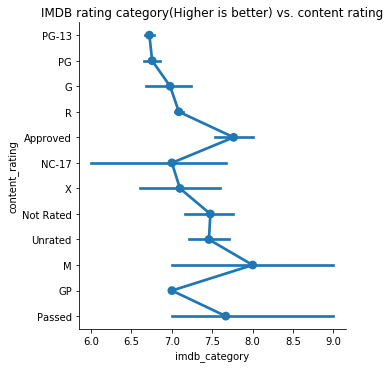

In [36]:
sns.catplot("imdb_category", "content_rating", data=df, kind='point')
plt.title("IMDB rating category(Higher is better) vs. content rating")

###### This graph is showing that M is the best for highest rating.  Aprroved and Passed are also rated decently well although this seems like its probably because its a broad category.

#### Now lets look at language and country

In [37]:
df.groupby('language').size()

language
Aboriginal       2
Arabic           1
Aramaic          1
Bosnian          1
Cantonese        8
Czech            1
Danish           3
Dari             2
Dutch            3
Dzongkha         1
English       3674
Filipino         1
French          37
German          13
Hebrew           3
Hindi           10
Hungarian        1
Icelandic        1
Indonesian       2
Italian          7
Japanese        12
Kazakh           1
Korean           5
Mandarin        14
Maya             1
Mongolian        1
None             1
Norwegian        4
Persian          3
Portuguese       5
Romanian         1
Russian          1
Spanish         26
Swedish          1
Telugu           1
Thai             3
Vietnamese       1
Zulu             1
dtype: int64

##### Since the majority of the movies are in english I am confident saying that this wouldn't be an accurate measure to determine imdb rating

In [38]:
df2 = df.groupby('country')
df2['imdb_score'].agg('sum').sort_values(ascending=False).head()

country
USA        19464.4
UK          2191.4
France       718.3
Germany      511.0
Canada       396.6
Name: imdb_score, dtype: float64

In [39]:
df2 = df.groupby('country')
df2['imdb_score'].agg('mean').sort_values(ascending=False).head()

country
West Germany    8.400
Brazil          7.760
Iran            7.725
Argentina       7.600
Sweden          7.600
Name: imdb_score, dtype: float64

##### The data shows that USA has the most imdb rating points not supprisingly since the most of the movies are made there, so sum isn't an accurate measure.  Mean shows that West Germany has the best mean rating.

####  The last category I wanted to look at is Budget.  My prediction is that a higher budget will lead to better rated movies.

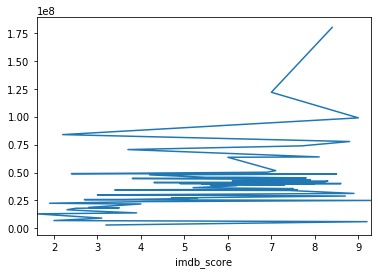

In [40]:
df2 = df.groupby('imdb_score')
df2['budget'].agg('mean').sort_values(ascending=False).plot()

It appears that Lower budget movies usually score lower and the score for the most part goes up as budget goes up.  There are alot of annomolies though, such as really low budget movies getting good scores.

### Part 5: Correlation Analysis

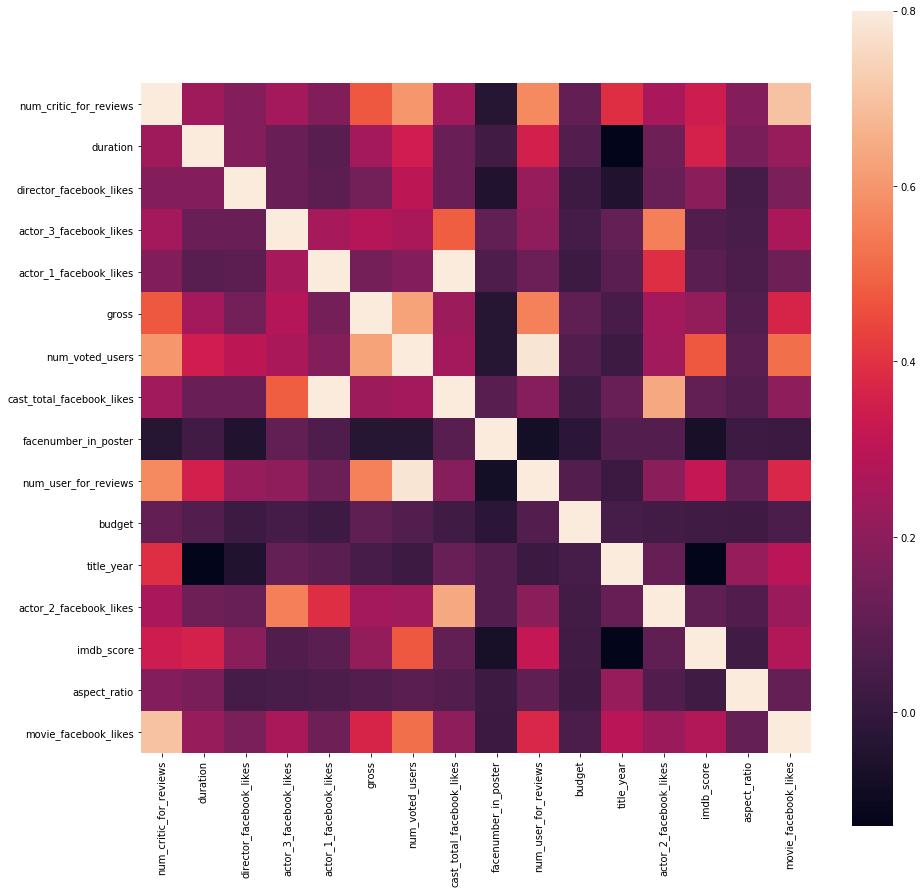

In [41]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),vmax=.8, square=True)

According to this heat map IMDB score (i.e. movie success) has the highest correlation with the number of voted users.  The next ones with notible correlation is duration, number critic for reviews, number users for reviews, movie facebook likes, and gross

In [42]:
stats.ttest_rel(df['imdb_score'], df['num_voted_users'])

Ttest_relResult(statistic=-42.28928360764955, pvalue=2.055e-321)

##### Number of voted users is heavily positivly correlated with imdb score, not suprising since the more people that vote, the more accurate it is.

In [43]:
stats.ttest_rel(df['imdb_score'], df['duration'].notnull())

Ttest_relResult(statistic=322.1163193768781, pvalue=0.0)

##### Duration actually doesn't effect imdb score once we remove the null duration values.

In [44]:
stats.ttest_rel(df['imdb_score'], df['budget'])

Ttest_relResult(statistic=-12.571122215887112, pvalue=1.5019883975675986e-35)

### Part 6: Regression

In this section I will explore the data with Regression by building a variety of models.  For Regression our Y value will be equal to imdb_score.

In [45]:
#assigning columns to X and Y variables
scoremodel1 = ols("imdb_score~duration",df)
score1 = scoremodel1.fit()
print(score1.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     571.5
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          6.97e-118
Time:                        22:22:17   Log-Likelihood:                -5405.7
No. Observations:                3856   AIC:                         1.082e+04
Df Residuals:                    3854   BIC:                         1.083e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6344      0.078     59.290      0.0

First I wanted to look at the regression between IMDB SCORE and Duration of the movie.  R-Squared = 0.129  Seems to be a strong model so far.

In [46]:
#assigning columns to X and Y variables
scoremodel2 = ols("imdb_score~num_critic_for_reviews",df)
score2 = scoremodel2.fit()
print(score2.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     510.8
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          2.59e-106
Time:                        22:22:17   Log-Likelihood:                -5432.8
No. Observations:                3856   AIC:                         1.087e+04
Df Residuals:                    3854   BIC:                         1.088e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5

For this second model I used the number of crits for reviews. R-Squared = 0.117 The duration model is slightly better.

In [47]:
#assigning columns to X and Y variables
scoremodel3 = ols("imdb_score~gross",df)
score3 = scoremodel3.fit()
print(score3.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     181.8
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           1.58e-40
Time:                        22:22:17   Log-Likelihood:                -5585.2
No. Observations:                3857   AIC:                         1.117e+04
Df Residuals:                    3855   BIC:                         1.119e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2995      0.021    306.149      0.0

This time I used Gross as the X variable and R-Squared = 0.045 this is not a good model

In [48]:
#assigning columns to X and Y variables
scoremodel4 = ols("imdb_score~movie_facebook_likes",df)
score4 = scoremodel4.fit()
print(score4.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     328.2
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           1.86e-70
Time:                        22:22:17   Log-Likelihood:                -5516.5
No. Observations:                3857   AIC:                         1.104e+04
Df Residuals:                    3855   BIC:                         1.105e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.3378 

The model with Movie Facebook likes in it has a R-Squared of 0.078 and will not be a good model compared to the others.

In [49]:
#assigning columns to X and Y variables
scoremodel5 = ols("imdb_score~num_voted_users",df)
score5 = scoremodel5.fit()
print(score5.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     1113.
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          1.28e-214
Time:                        22:22:17   Log-Likelihood:                -5184.9
No. Observations:                3857   AIC:                         1.037e+04
Df Residuals:                    3855   BIC:                         1.039e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.1242      0.018    3

#### The R-Square for this model is 0.224 meaning this is the best model so far.  This matches up with our statistical analysis.

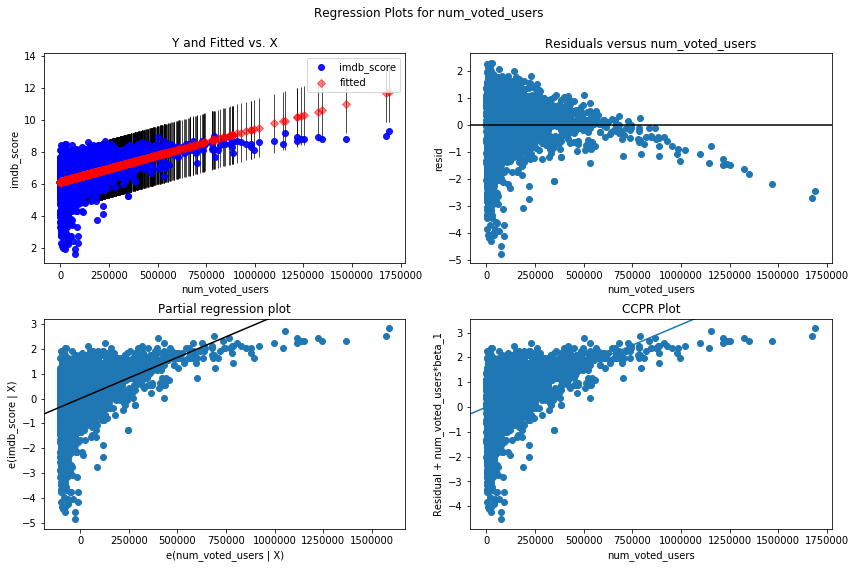

In [50]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(score5, "num_voted_users", fig=fig)  #graphing the results

### Part 7: Classificiation

In this section I am going to be building classification models to try and predict if a movie will have a high IMDB Score.  I will use a variety of Classification Models.

In [51]:
bins1 = [0,4,6,8,10]
#seperate the bins
labels1 = ['Bad','Ok', 'Good', 'Excellent']
df['score'] =  pd.cut(df['imdb_score'], bins=bins1, labels=labels1)
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdb_category,score
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,8,Good
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,8,Good
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,7,Good
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,9,Excellent
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,7,Good


This seperates the imdb scores into bins basically grouping them.  The score goes from 0-10 with 10 being the best in the imdb_category column then it outputs Bad OK Good or Excellent into the score column depending on its score.

### Decision Tree Model

Next I am going to drop columns with text values since they will skew the model

In [52]:
df3 = df.drop(['director_name', 'imdb_score', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'plot_keywords', 'color', 'genres', 'language', 'country', 'content_rating', 'aspect_ratio', 'movie_imdb_link', 'movie_title', 'score'], axis=1)
df3.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,movie_facebook_likes,imdb_category
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,33000,8
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,0,8
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,85000,7
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,164000,9
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,24000,7


In [53]:
df3 = df3.dropna() #dropping null values because the model will not run without them

In [54]:
df3.isnull().sum() #check for null values

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
budget                       0
title_year                   0
actor_2_facebook_likes       0
movie_facebook_likes         0
imdb_category                0
dtype: int64

In [55]:
y = df3['imdb_category']
X = df3.drop(['imdb_category'], axis=1) #set up the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [56]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=6)
dt = dt.fit(X_train, y_train)
# Train a decision tree model
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [57]:
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
#print(metrics.roc_auc_score(y_test, dt.predict(X_test)))  #could not get the auc score to go through

0.4652777777777778
--------------------------------------------------------
[[  0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   4   4   0   0   0]
 [  0   0   0   0  15  12   0   0   0]
 [  0   0   0   0  42  40   0   0   0]
 [  0   0   0   0  65 183   1   0   0]
 [  0   0   0   0  44 366  46   0   0]
 [  0   0   0   0   8 188  94   7   0]
 [  0   0   0   0   0   7  13  11   0]
 [  0   0   0   0   0   0   0   1   0]]
--------------------------------------------------------
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        27
           5       0.00      0.00      0.00        82
           6       0.36      0.26      0.30       249
           7       0.46      0.80      0.58       456
           8       0.61      0.32      0.42       297
           9       0.58      0.35      0.44        31
          10       0.00     

### The accuracy of this model is 46%

In [58]:
!pip install pydotplus

### SelectKBest Model

In [59]:
X_new = SelectKBest(chi2, k=5).fit_transform(X, y)
print(X_new)

[[0.00000000e+00 7.60505847e+08 8.86204000e+05 2.37000000e+08
  3.30000000e+04]
 [5.63000000e+02 3.09404152e+08 4.71220000e+05 3.00000000e+08
  0.00000000e+00]
 [0.00000000e+00 2.00074175e+08 2.75868000e+05 2.45000000e+08
  8.50000000e+04]
 ...
 [0.00000000e+00 2.04092000e+06 5.20550000e+04 7.00000000e+03
  0.00000000e+00]
 [0.00000000e+00 4.58400000e+03 1.33800000e+03 9.00000000e+03
  4.13000000e+02]
 [1.60000000e+01 8.52220000e+04 4.28500000e+03 1.10000000e+03
  4.56000000e+02]]


In [60]:
selector = SelectKBest(chi2, k=5).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[ 2  5  6 10 13]


In [61]:
X.head(1)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,33000


### The Select K Best model shows that our  Top Predictors of a good movie are:
1. Director Facebook Likes
2. Gross
3. Number of voted users
4. Budget
5. Movie Facebook Likes
Lets test how accurate our model is...

In [62]:
X = df3[['director_facebook_likes','gross','num_voted_users', 'budget', 'movie_facebook_likes']]
# Train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [63]:
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
#print(metrics.roc_auc_score(y_test, dt.predict(X_test)))

0.4105902777777778
--------------------------------------------------------
[[  0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   2   5   1   0   0]
 [  0   0   1   2   8  14   2   0   0]
 [  0   0   3  12  34  21  12   0   0]
 [  0   2   6  23  83 104  31   0   0]
 [  1   3  10  24  87 222 106   3   0]
 [  0   1   1  10  24 105 143  13   0]
 [  0   0   0   0   0   3  16  12   0]
 [  0   0   0   0   0   0   0   1   0]]
--------------------------------------------------------
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         8
           4       0.05      0.04      0.04        27
           5       0.17      0.15      0.16        82
           6       0.35      0.33      0.34       249
           7       0.47      0.49      0.48       456
           8       0.46      0.48      0.47       297
           9       0.41      0.39      0.40        31
          10       0.00     

The accuracy of this test is 41% which isn't as good at the decision tree model

### ExtraTreesClassifier Feature Importance

In [64]:
X = df3.drop(['imdb_category'], axis=1)

model_extra = ExtraTreesClassifier()
model_extra.fit(X, y)
print(model_extra.score(X, y))

# display the relative importance of each attribute
print((model_extra.feature_importances_))

1.0
[0.08032693 0.0829606  0.06649267 0.06753946 0.05468596 0.07509765
 0.10911864 0.06256562 0.05050386 0.07455434 0.08002837 0.0754046
 0.05786004 0.06286126]


In [65]:
print("Features sorted by their rank:")
print(sorted(zip([round(x, 4) for x in model_extra.feature_importances_], X.columns)))

Features sorted by their rank:
[(0.0505, 'facenumber_in_poster'), (0.0547, 'actor_1_facebook_likes'), (0.0579, 'actor_2_facebook_likes'), (0.0626, 'cast_total_facebook_likes'), (0.0629, 'movie_facebook_likes'), (0.0665, 'director_facebook_likes'), (0.0675, 'actor_3_facebook_likes'), (0.0746, 'num_user_for_reviews'), (0.0751, 'gross'), (0.0754, 'title_year'), (0.08, 'budget'), (0.0803, 'num_critic_for_reviews'), (0.083, 'duration'), (0.1091, 'num_voted_users')]


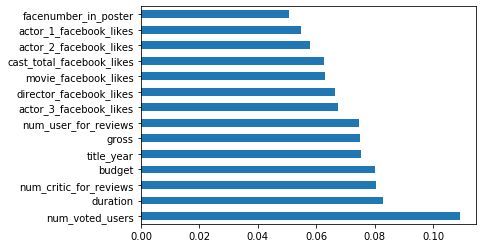

In [66]:
pd.DataFrame(model_extra.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False).plot(kind='barh', 
                                                                                                            legend=None);

### This model is showing that the most important variables in predicting imdb score.  The top ones are:

1. Number of voted users (by far)
2. Duration
3. Number users for reviews
4. Budget
5. Title Year

### Random Forest Classifier


In [67]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = RandomForestClassifier(n_estimators=20)
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.5008680555555556

In [68]:
print(metrics.accuracy_score(y_test, clf.predict(X_test)))
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.5008680555555556
[[  0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   4   4   0   0   0]
 [  0   0   0   3  14  10   0   0   0]
 [  0   0   0   5  41  33   3   0   0]
 [  0   0   1   6  90 136  16   0   0]
 [  0   0   0   1  68 311  76   0   0]
 [  0   0   0   0  17 115 158   7   0]
 [  0   0   0   0   0   1  17  13   0]
 [  0   0   0   0   0   0   0   1   0]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        27
           5       0.33      0.06      0.10        82
           6       0.38      0.36      0.37       249
           7       0.51      0.68      0.58       456
           8       0.59      0.53      0.56       297
           9       0.62      0.42      0.50        31
          10       0.00      0.00      0.00         1

    accuracy                           0.50      1152
   macro avg       0.27      0.23

Our best model is the Random Forest classifier with and Accuracy of 50%

### Part 9: Clustering Analysis

In this section I will perform clustering analysis using K-means algorithm and Hierarchical clustering algorithm.  My K value will be equal to 2, in order to have 2 clusters.  One low imdb score and one high.

#### Normalizing the data

In [69]:
df = pd.read_csv("data\movie_metadata.csv_movie_metadata.csv")
df.head() #pull the original file

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [70]:
df2 = df.drop(['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'plot_keywords', 'color', 'genres', 'language', 'country', 'content_rating', 'aspect_ratio', 'movie_imdb_link', 'movie_title',], axis=1)
df2.head() #drop all columns with words in it

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,164000
4,NaN,NaN,131.0,NaN,131.0,NaN,8,143,0.0,NaN,NaN,NaN,12.0,7.1,0


In [71]:
df3 = df3.dropna()

In [72]:
df_norm = (df2 - df2.mean()) / (df2.max() - df2.min())
df_norm.head() #normalize

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,0.717741,0.140474,-0.029848,0.009130,-0.008688,0.936268,0.474941,-0.007408,-0.031888,0.549759,0.016147,0.065295,-0.005224,0.184540,0.072992
1,0.199268,0.122617,-0.005370,0.015434,0.052250,0.343108,0.229353,0.058854,-0.031888,0.190794,0.021305,0.045295,0.024440,0.083274,-0.021564
2,0.568726,0.080950,-0.029848,-0.021044,0.006937,0.199349,0.113744,0.003047,-0.008632,0.142564,0.016802,0.125295,-0.009188,0.045299,0.221989
3,0.828578,0.112696,0.926674,0.971956,0.031937,0.525522,0.627704,0.147793,-0.031888,0.479982,0.017212,0.095295,0.155827,0.260489,0.448350
4,NaN,NaN,-0.024153,NaN,-0.010045,NaN,-0.049510,-0.014551,-0.031888,NaN,NaN,NaN,-0.011969,0.083274,-0.021564


In [73]:
df_norm = df_norm.dropna()

In [74]:
df_norm.isnull().sum()

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
movie_facebook_likes         0
dtype: int64

#### Clustering

In [75]:

X = df_norm.drop(['imdb_score'], axis=1)
y = df_norm['imdb_score']

In [76]:
k_means = KMeans(init='k-means++', n_clusters=2, random_state=0)
k_means.fit(X)
k_means.labels_
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels_unique = np.unique(k_means_labels)

In [77]:
print(k_means_labels)
print(k_means_cluster_centers)
print(k_means_labels_unique)

[1 1 1 ... 0 0 0]
[[-0.02675793 -0.00034454 -0.01295375 -0.00535416 -0.00038785 -0.01879705
  -0.01660615 -0.00090395  0.0010308  -0.01205118 -0.00044644 -0.00464777
  -0.00156569 -0.0125464 ]
 [ 0.2638924   0.03008714  0.07750402  0.0477626   0.01021411  0.09818822
   0.13015421  0.01666357 -0.0030783   0.10858891  0.00426948  0.05173988
   0.01911252  0.07725257]]
[0 1]


In [78]:
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,1
1,1
2,1
3,1
4,1


In [79]:
df2 = df_norm.join(df1)
df2.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,cluster
0,0.717741,0.140474,-0.029848,0.009130,-0.008688,0.936268,0.474941,-0.007408,-0.031888,0.549759,0.016147,0.065295,-0.005224,0.184540,0.072992,1.0
1,0.199268,0.122617,-0.005370,0.015434,0.052250,0.343108,0.229353,0.058854,-0.031888,0.190794,0.021305,0.045295,0.024440,0.083274,-0.021564,1.0
2,0.568726,0.080950,-0.029848,-0.021044,0.006937,0.199349,0.113744,0.003047,-0.008632,0.142564,0.016802,0.125295,-0.009188,0.045299,0.221989,1.0
3,0.828578,0.112696,0.926674,0.971956,0.031937,0.525522,0.627704,0.147793,-0.031888,0.479982,0.017212,0.095295,0.155827,0.260489,0.448350,1.0
5,0.396312,0.049204,-0.009196,-0.005000,-0.009250,0.032334,0.076068,-0.011917,-0.008632,0.091961,0.018333,0.095295,-0.007443,0.019983,0.047204,1.0


In [80]:
df2.groupby(['cluster']).count()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
cluster,,,,,,,,,,,,,,,
0.0,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649
1.0,656,656,656,656,656,656,656,656,656,656,656,656,656,656,656


Cluster 0 has 2649 entries and cluster 1 has 656 entries

In [81]:
df2.groupby(['cluster']).mean() #lets see what the cluster are made of

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
cluster,,,,,,,,,,,,,,,
0.0,0.024051,0.007032,0.005046,0.004301,0.001906,-0.000511,0.009558,0.002685,0.001561,0.008229,0.000344,0.006880,0.002309,-0.002400,0.002092
1.0,0.098245,0.016587,0.019831,0.023841,0.005187,0.062540,0.048264,0.008883,-0.001081,0.044622,0.003538,0.025828,0.010537,0.005993,0.025239


### Cluster Profiles
1. Cluster 0: Lower Imdb Score, Lower Budget, lower number of users for reviews, Lower Number of voted Users, lower Gross, Lower Duration, lower critic for reviews
2. Cluster 1: Higher IMDB Score,Higher Budget,Higher Number of users for reviews, Higher Number of voted users, Higher Gross, Higher Duration, higher critic for reviews

This is so far confirming our theory that Higher IMDB score is related to High Durations, High voting users, High Gross, High Budget, and Higher critic for review

### Decision Tree

In [82]:
df2 = df2.dropna()

In [83]:
y = df2['cluster']

X = df2.drop(['cluster'], axis=1)

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [86]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [87]:
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, dt.predict(X_test)))

0.7158403869407497
--------------------------------------------------------
[[546 119]
 [116  46]]
--------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       665
         1.0       0.28      0.28      0.28       162

    accuracy                           0.72       827
   macro avg       0.55      0.55      0.55       827
weighted avg       0.72      0.72      0.72       827

--------------------------------------------------------
0.5525016244314489


#### This clustering model has the Highest accuracy out of any of our models with 71%

### Which features are important in clustering analysis?

In [88]:
clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X, y)
clf.score(X,y)

0.9918305597579425

In [89]:
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_})

,feature,importance
0,num_critic_for_reviews,0.077886
1,duration,0.057895
2,director_facebook_likes,0.059689
3,actor_3_facebook_likes,0.061426
4,actor_1_facebook_likes,0.054652
5,gross,0.098806
6,num_voted_users,0.080585
7,cast_total_facebook_likes,0.063361
8,facenumber_in_poster,0.027435
9,num_user_for_reviews,0.065842


### Our most important features in clustering analysis are:
1. Number critic for reviews
2. Duration
3. Director Facebook Likes

###  Hierarchical clustering

In [90]:
X = df_norm.drop(['imdb_score'], axis=1)
y = df_norm['imdb_score']


In [91]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X)
agg.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

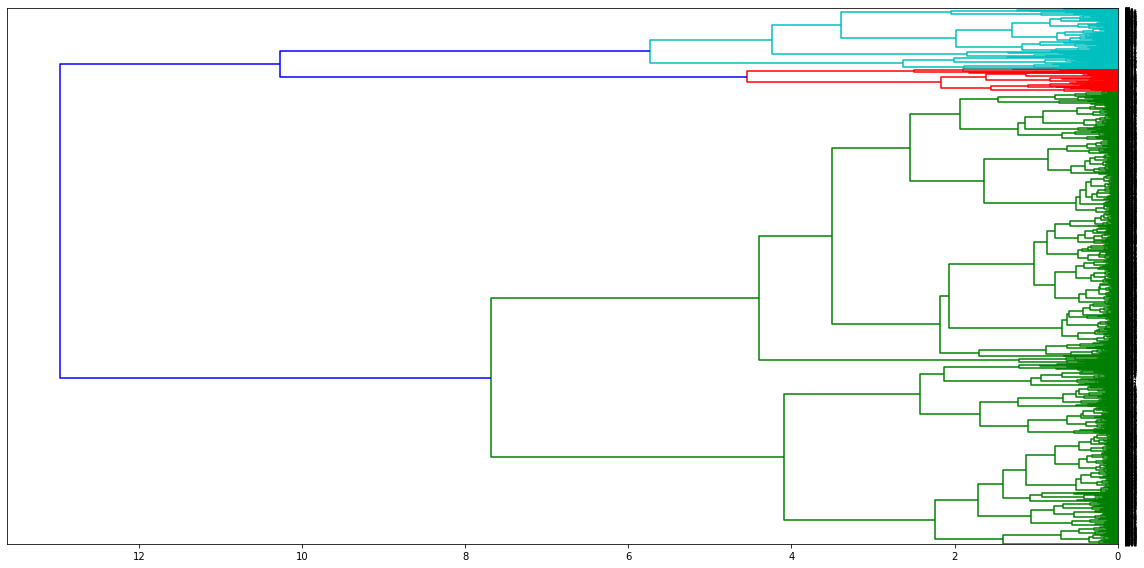

In [92]:
plt.figure(figsize=(16,8))

linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="left")
plt.tight_layout() # fixes margins
# the Chart

In [93]:
df1 = pd.DataFrame(agg.labels_, columns = ['cluster'])
df1.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [94]:
df = pd.read_csv("data\movie_metadata.csv_movie_metadata.csv")
df2 = df.dropna()

In [95]:
df2 = df2.drop(['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'plot_keywords', 'color', 'genres', 'language', 'country', 'content_rating', 'aspect_ratio', 'movie_imdb_link', 'movie_title',], axis=1)

In [96]:
df2 = df.join(df1)
df2.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,cluster
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,0.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,0.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,0.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,0.0


In [97]:
df2.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
cluster,,,,,,,,,,,,,,,,
0.0,206.517707,113.522689,1027.485520,1113.530201,9264.170569,9.764181e+07,152423.732441,14448.267559,1.323283,472.895447,8.349013e+07,2004.928082,2770.122278,6.512207,2.28681,14781.494983
1.0,147.547459,109.492204,740.090087,696.992658,7200.396641,4.793851e+07,90280.010382,10654.060458,1.432854,285.819627,4.245095e+07,2002.998129,1832.450183,6.425405,2.20911,7732.025038


### Cluster Profiles
1. Cluster 0: Higher IMDB Score,Highest Gross, Slightly Higher Duration, Higher num critic for reviews, Higher Num users for reviews, Higher Budget
2. Cluster 1: Lower IMDB Score slightly,Low Gross, slightly less duration, Low num critic for reviews, lower num users for reviews, Lower Budget

In [98]:
df2 = df2.drop(['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'plot_keywords', 'color', 'genres', 'language', 'country', 'content_rating', 'aspect_ratio', 'movie_imdb_link', 'movie_title',], axis=1)

In [99]:

df2 = df2.dropna()
y = df2['cluster']

X = df2.drop(['cluster'], axis=1)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [101]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [102]:
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, dt.predict(X_test)))

0.7484885126964933
--------------------------------------------------------
[[ 43  88]
 [120 576]]
--------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.26      0.33      0.29       131
         1.0       0.87      0.83      0.85       696

    accuracy                           0.75       827
   macro avg       0.57      0.58      0.57       827
weighted avg       0.77      0.75      0.76       827

--------------------------------------------------------
0.5779152408528561


This Hierarchical clustering algorithm Produces the best accuracy out of all with 76%

### Story Telling

#### Regression, Classification, and Clustering analysis

1. In Regression we learned that Num of voted users has a high R-Squared when looking at High IMDB Score.  This makes it the most accurate.  In second place was the duration model.
2. In Classification analysis we explored a variety of models.  The models used were: 
Decision Tree Model: 48% Accurate
Select K Best: 39% Accurate
Extra Tree Classifier Model
Random Forest Classifier: 51% Accurate

With this information we can say that our best model for Classification is Random Forest Classifier.  I have noticed on previous project that this one works really well and seems to be very accurate.

3. These Classification models arn't the most accurate.  A 51% chance is almost like tossing a coin.  Our Clustering Models look much better though.  I used a K value of 2 since we are looking for High IMDB score and Low.  Looking at our Models:
K-Mean Clustering: 71% Accurate
K-Mean Cluster Profiles:

Cluster 0: Lower Imdb Score, Lower Budget, lower number of users for reviews, Lower Number of voted Users, lower Gross, Lower Duration, lower critic for reviews

Cluster 1: Higher IMDB Score,Higher Budget,Higher Number of users for reviews, Higher Number of voted users, Higher Gross, Higher Duration, higher critic for reviews


Hierarchical clustering algorithm: 76% accurate
Hierarchical clustering Profiles:

Cluster 0: Higher IMDB Score,Highest Gross, Slightly Higher Duration, Higher num critic for reviews, Higher Num users for reviews, Higher Budget

Cluster 1: Lower IMDB Score slightly,Low Gross, slightly less duration, Low num critic for reviews, lower num users for reviews, Lower Budget

4. Our best Model overall is the Hierarchical Clustering model.  We should pitch this one to the client.  The only thing I don't like much about it is that the values are close together.  For instance in the clusters IMDB score only varies a tiny bit between clusters.  This however doesn't effect the accuracy.

5. From the looks of Cluster Analysis using the Hierarchical model in order to make a good movie some contributing factors on it being rated well are: High Gross, High Duration, High Number of critic for reviews, High Number of Users for reviews, High Budget.


#### Midterm Project StoryTelling:

My inital prediction for variables that are highly correlated to imdb score were duration, the director, the lead actors in the movie, and the genre.  I learned the following:

1. I was able to show that providing you know the actors and directors you may be able to accuratly see if a movie will perform well.
2. Animation, Crime, Drama, and Adventure films consisitaly get high imdb ratings.
3. Most movies get a 7 (rounded) rating with 8 being a close second
4. M rated material tends to get a higher rating.
5. Duration has a positive correlation with imdb rating, meaning as duration goes up usually rating does as well.  I did notice a small drop off for the highest rated movies.
6. Takashi Shirmura, Jeffrey DeMunn, and Phil LaMarr are actors with the highest average imdb rating of movies they were in.  Any movie they are in will surely get rated well.
7. Gross has a slight positive correlation with rating as well.
8. Budget has nothing to do with predicting if a movie will do well.
10. Movies made in West Germany have the highest average rating
11. Most movies are made in English and in the USA.
12. number of voted users has the highest positive correlation with rating.
13. There are no negative correlations that I noticed.
14. Number critics for reviews, number users for reviews, and movie facebook likes have positive correlations with rating as well.

## References:

1. Dr. B. Chae
2. Yueming Zhang (12/7/2017 Project Report: IMDB 5000 Movie Dataset)  http://rstudio-pubs-static.s3.amazonaws.com/342210_7c8d57cfdd784cf58dc077d3eb7a2ca3.html
3. https://stackoverflow.com/questions/43821529/filter-out-nan-rows-in-a-specific-column
4. PopCulture (https://data.world/popculture/imdb-5000-movie-dataset) Owen Temple